#### Import Library

In [24]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, mean_squared_error, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns


Load Dataset

In [25]:
dataset = pd.read_csv(r"C:\Users\Rtx3070\Downloads\ai4i2020.csv")
dataset

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [26]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [27]:
dataset.drop(columns=['UDI','Product ID'],inplace=True)
# Creating new feature: temperature difference between process and air
dataset['temperature_difference']=dataset['Process temperature [K]']-dataset['Air temperature [K]']
# Creating new feature: mechanical power using torque and rotational speed
dataset['Mechanical Power [W]']=np.round((dataset['Torque [Nm]']*dataset['Rotational speed [rpm]']* 2 * np.pi) / 60,4)
dataset

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,temperature_difference,Mechanical Power [W]
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,10.5,6951.5906
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,10.5,6826.7227
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,10.4,7749.3875
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,10.4,5927.5047
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,10.5,5897.8166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0,9.6,4955.1294
9996,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0,9.5,5434.7040
9997,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0,9.6,5753.6175
9998,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0,9.7,7151.1026


<Axes: >

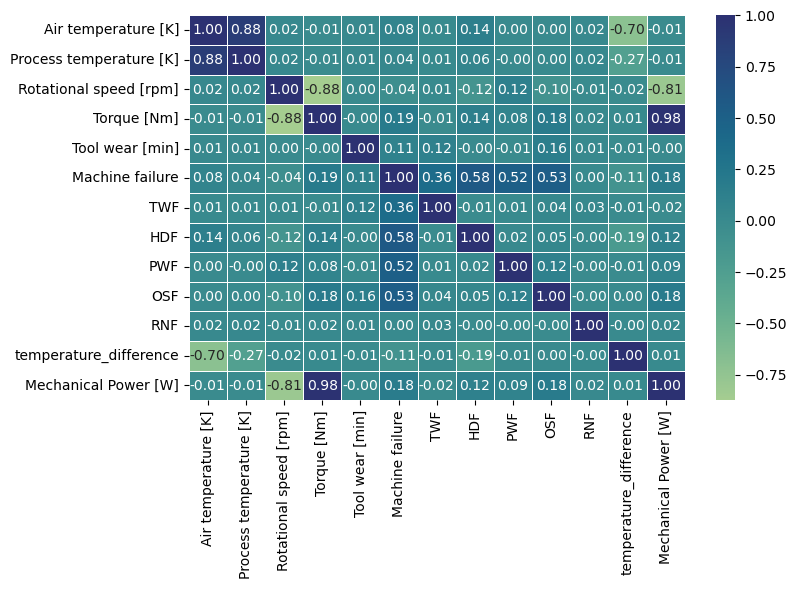

In [28]:
# Checking correlation between numerical features using a heatmap
corr_matrix=dataset.corr(numeric_only=True)
plt.figure(figsize=(8,5))
sns.heatmap(corr_matrix,annot=True,cmap='crest',fmt=".2f", linewidths=0.5)

<Axes: >

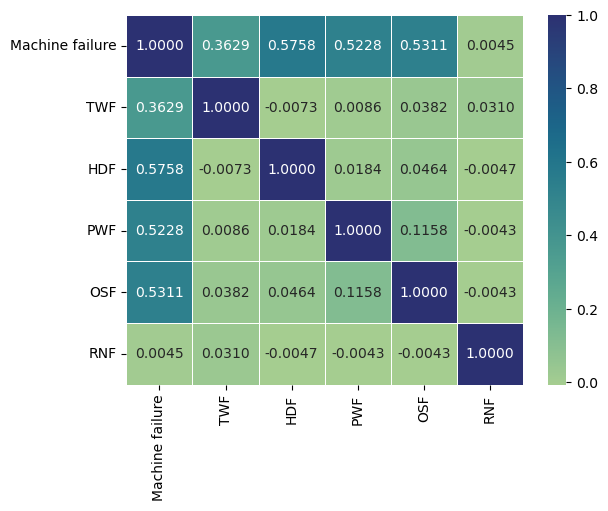

In [29]:
# Checking correlation between different failure using a heatmap
target=dataset.iloc[:,[6,7,8,9,10,11]]
target_mat=target.corr()
sns.heatmap(target_mat,annot=True,cmap="crest",fmt=".4f",linewidth=0.5)

In [30]:
dataset.drop(columns=['TWF','HDF','PWF','OSF','RNF'],inplace=True)
dataset.sample(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,temperature_difference,Mechanical Power [W]
1576,L,298.3,308.4,1490,41.7,170,0,10.1,6506.5525
5175,L,304.2,313.4,1740,23.7,86,0,9.2,4318.4333
5158,L,304.1,313.3,1459,50.3,39,0,9.2,7685.1420


In [31]:
# Label encoding categorical variables (column- Type)
from sklearn.preprocessing import LabelEncoder
dataset['Type'] = LabelEncoder().fit_transform(dataset['Type'])

In [32]:
# Scaling numerical features using StandardScaler for model compatibility
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data=pd.DataFrame(scale.fit_transform(dataset),columns=dataset.columns,index=dataset.index)
data.sample(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,temperature_difference,Mechanical Power [W]
2274,-0.332223,-0.352437,-0.947360,-0.104733,-0.630682,-0.501972,-0.187322,-0.699899,-0.857795
9459,-0.332223,-0.802401,-0.610355,0.224370,-0.389922,0.236430,-0.187322,0.698641,-0.290922
3369,-0.332223,0.747476,0.602860,6.812010,-3.208820,-1.460324,5.338401,-0.600004,-3.717129
959,-0.332223,-2.102298,-2.362778,-0.188404,-0.480207,-0.344865,-0.187322,0.698641,-0.685905
2471,-0.332223,-0.552421,-1.082162,-1.326319,1.114828,0.472090,-0.187322,-0.500108,0.639087
6227,-0.332223,0.597488,0.535460,-0.333432,-0.179257,0.487801,-0.187322,-0.400212,-0.340380
7023,1.333889,0.347507,0.400658,0.185324,-0.149162,-0.910450,-0.187322,-0.100525,0.054437
4179,-0.332223,1.197440,0.602860,-1.058575,0.613245,0.629197,5.338401,-1.499065,0.217977
7370,1.333889,-0.202449,0.063653,-0.467305,0.613245,-0.501972,-0.187322,0.498849,0.697404
8780,1.333889,-1.252366,-0.947360,-1.181291,1.215145,-1.318927,-0.187322,1.098224,0.899630


Memisahkan Fitur dan Label

In [33]:
Y=dataset.pop("Machine failure")
X=dataset
X

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],temperature_difference,Mechanical Power [W]
0,2,298.1,308.6,1551,42.8,0,10.5,6951.5906
1,1,298.2,308.7,1408,46.3,3,10.5,6826.7227
2,1,298.1,308.5,1498,49.4,5,10.4,7749.3875
3,1,298.2,308.6,1433,39.5,7,10.4,5927.5047
4,1,298.2,308.7,1408,40.0,9,10.5,5897.8166
...,...,...,...,...,...,...,...,...
9995,2,298.8,308.4,1604,29.5,14,9.6,4955.1294
9996,0,298.9,308.4,1632,31.8,17,9.5,5434.7040
9997,2,299.0,308.6,1645,33.4,22,9.6,5753.6175
9998,0,299.0,308.7,1408,48.5,25,9.7,7151.1026


In [34]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Machine failure, Length: 10000, dtype: int64

Handling Imbalance Data

In [35]:
# print distribution of class before SMOTE
from collections import Counter

counts = Counter(Y)
print(counts)

Counter({0: 9661, 1: 339})


In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [37]:
# print distribution of class AFTER SMOTE
counts = Counter(y_resampled )
print(counts)

Counter({0: 9661, 1: 9661})


In [38]:
# Rename columns to remove special characters that cause issues with some models (like Random Forest)
X_resampled.columns = X_resampled.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '')

X_train,X_test,Y_train,Y_test=train_test_split(X_resampled,y_resampled,test_size=0.2)

In [39]:
# Importing machine learning models
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Define models
model = RandomForestClassifier(criterion='gini', max_depth=30 ,random_state=42)

In [41]:
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
acc=accuracy_score(Y_test,y_pred)

In [42]:
print("Hasil Akurasi Model Random Forest")
print(round(acc * 100, 2))

Hasil Akurasi Model Random Forest
98.53


In [43]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Classification Report
    print(f"--------- {model_name} Classification Report ------ \n\n")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    # ROC Curve
    roc_auc = roc_auc_score(y_test, y_prob)
    RocCurveDisplay.from_predictions(y_test, y_prob)
    plt.title(f"{model_name} - ROC Curve (AUC = {roc_auc:.2f})")
    plt.show()

    # Mean Squared Error
    mse = mean_squared_error(y_test, y_prob)
    print(f"\n Mean Squared Error (MSE) on Probabilities: {mse:.4f}")

--------- Random Forest Classification Report ------ 


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1945
           1       0.98      0.99      0.99      1920

    accuracy                           0.99      3865
   macro avg       0.99      0.99      0.99      3865
weighted avg       0.99      0.99      0.99      3865



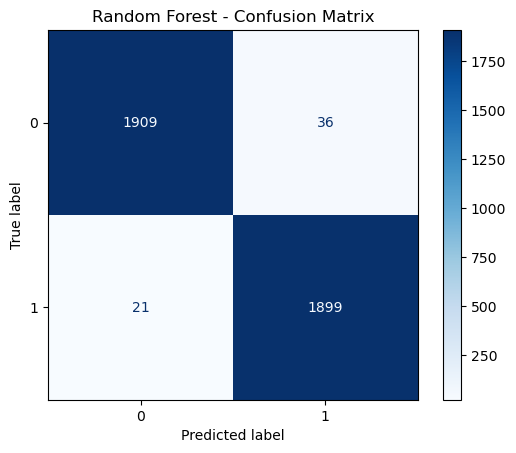

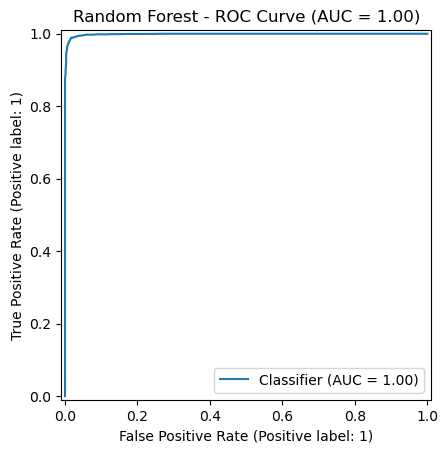


 Mean Squared Error (MSE) on Probabilities: 0.0140


In [44]:
evaluate_model(model, X_test, Y_test, model_name="Random Forest")

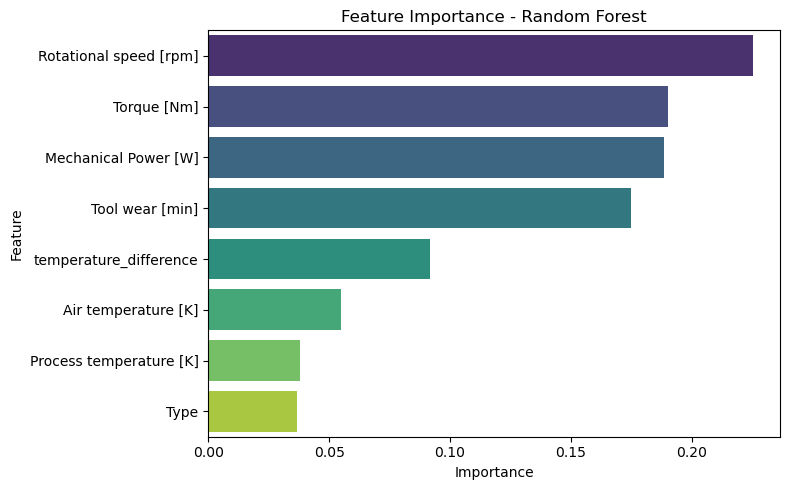

In [45]:
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

Cross Validation

In [46]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Clean up column names to remove special characters that cause issues with some models (like Random Forest)
X.columns = X.columns.str.replace('[', '').str.replace(']', '').str.replace('<', '')


print("Cross Validation Scores Random Forest:")
cv_scores = cross_val_score(model, X, Y, cv=cv, scoring='accuracy')
print(f"  Stratified 5-Fold CV Accuracy: {cv_scores}")
print(f"  Mean CV Accuracy: {cv_scores.mean():.4f}")
print("-" * 20)
    

Cross Validation Scores Random Forest:
  Stratified 5-Fold CV Accuracy: [0.9895 0.991  0.9885 0.9905 0.986 ]
  Mean CV Accuracy: 0.9891
--------------------
